# Concrete Compressive Strength Predictor

Compressive strength refers to the ability of a certain material or structural element to withstand loads that reduce the size of that material, or structural element, when applied. A force is applied to the top and bottom of a test sample, until the sample fractures or is deformed.

Our objective is to build a machine learning model that would help civil engineers to estimate the compressive strength of the concrete with the help of these features present in this dataset:
* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Superplasticizer
* Coarse Aggregate
* Fine Aggregate
* Age

This can further help the technicians to determine the safe and economical choice to make in their projects.

## Import packages and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/concrete_data.csv")
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.columns=['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Compressive_strength']

## Exploratory Data Analysis

In [ ]:
#look at null count and dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast_Furnace_Slag    1030 non-null   float64
 2   Fly_Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse_Aggregate      1030 non-null   float64
 6   Fine_Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


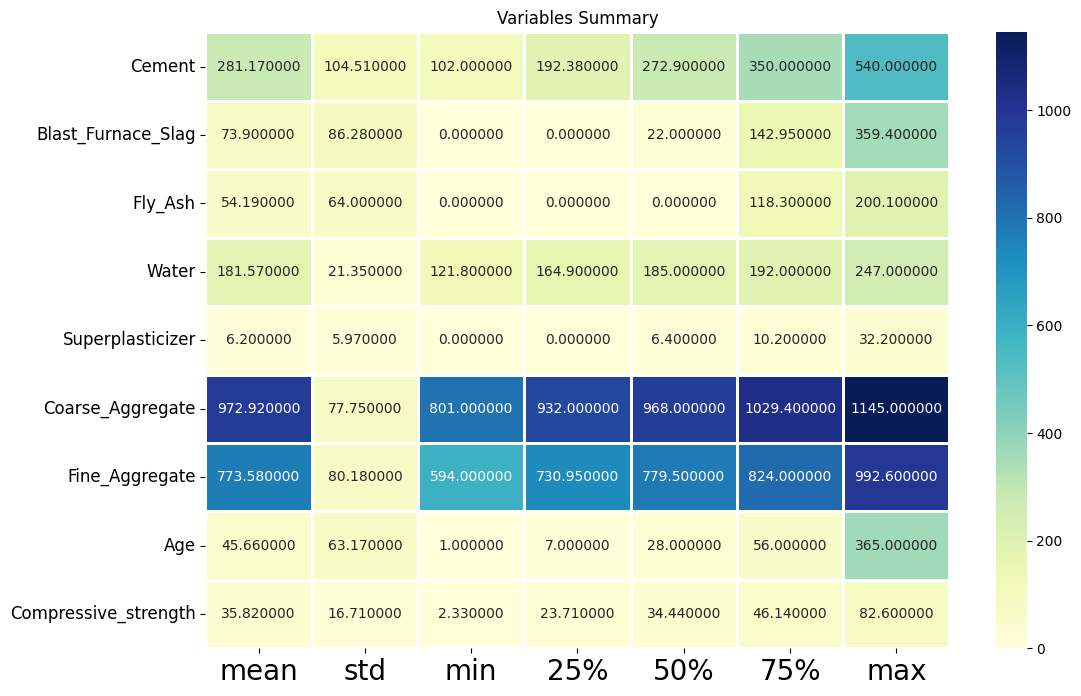

In [ ]:
# Data summary visualization

plt.figure(figsize=(12, 8))
summary_stats = data.describe()[1:].transpose().round(2)
sns.heatmap(summary_stats, linewidth=2, annot=True, fmt="f", cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

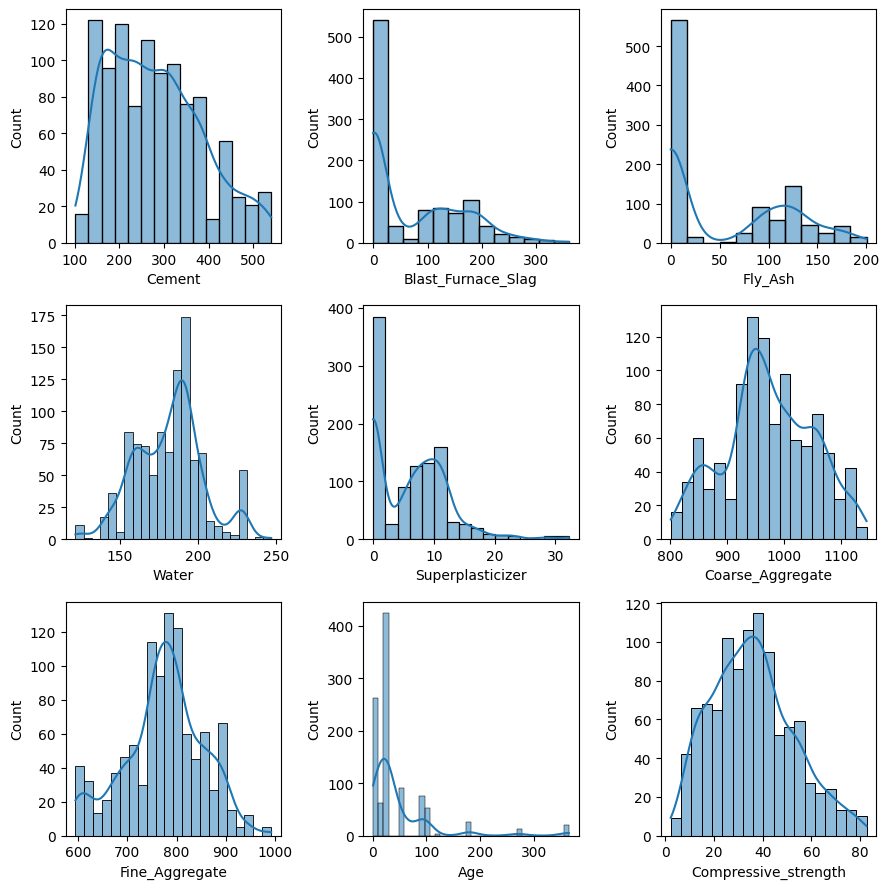

In [ ]:
# Histogram of the complete datset
fig, ax2 = plt.subplots(3, 3, figsize=(9, 9))

sns.histplot(data['Cement'], ax=ax2[0][0], kde=True)
sns.histplot(data['Blast_Furnace_Slag'], ax=ax2[0][1], kde=True)
sns.histplot(data['Fly_Ash'], ax=ax2[0][2], kde=True)
sns.histplot(data['Water'], ax=ax2[1][0], kde=True)
sns.histplot(data['Superplasticizer'], ax=ax2[1][1], kde=True)
sns.histplot(data['Coarse_Aggregate'], ax=ax2[1][2], kde=True)
sns.histplot(data['Fine_Aggregate'], ax=ax2[2][0], kde=True)
sns.histplot(data['Age'], ax=ax2[2][1], kde=True)
sns.histplot(data['Compressive_strength'], ax=ax2[2][2], kde=True)

# Adjust the layout for better spacing
plt.tight_layout()

plt.show()

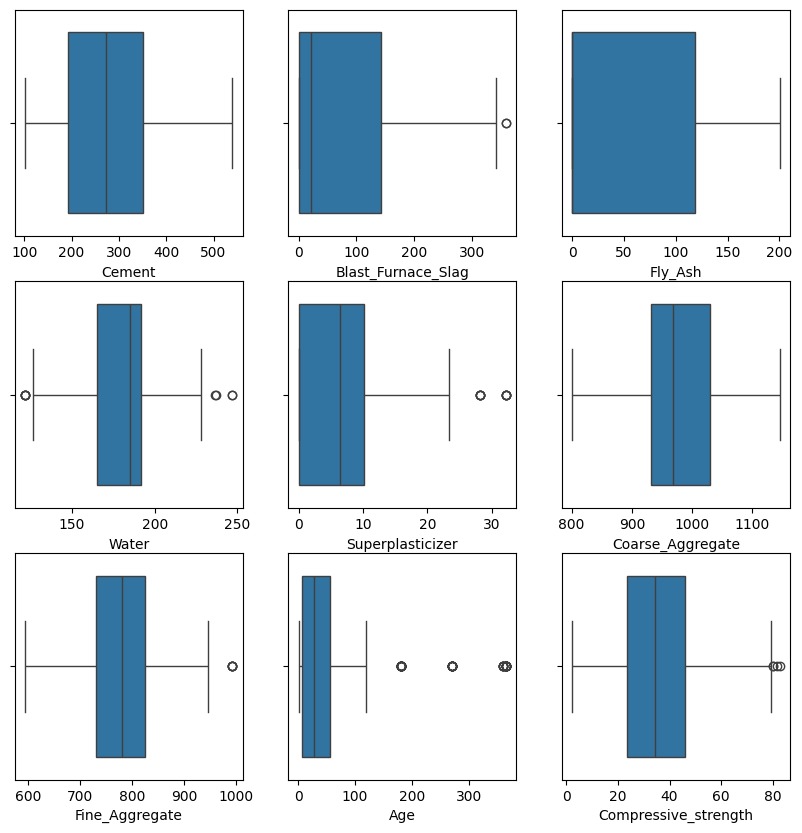

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (10,10));
col_cnt = 0
col_names = data.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.boxplot(data[col_names[col_cnt]], ax=axes[r][c], orient="h");
            col_cnt += 1
        except:
            pass

There are a few outliers in slag, water, superplasticizer, fine_agg and age.

Removing the rows with outliers removes around 10% of the data so we will substitute them with the mean values.

In [ ]:
outlier_cols = ["Blast_Furnace_Slag", "Water", "Superplasticizer", "Fine_Aggregate", "Age"]
data_summary = data.describe()

def cap_outliers(data, col):
    q1 = data_summary[col].loc["25%"]
    q3 = data_summary[col].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data.loc[data[col] < lower_bound, col] = data_summary[col].loc["mean"]
    data.loc[data[col] > upper_bound, col] = data_summary[col].loc["mean"]
    return data

for col in outlier_cols:
    data = cap_outliers(data, col)



In [ ]:
print(data)

      Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate        Age  Compressive_strength  
0               1040.0           676.0  28.000000                 79.99  
1          

##Multivariate Analysis

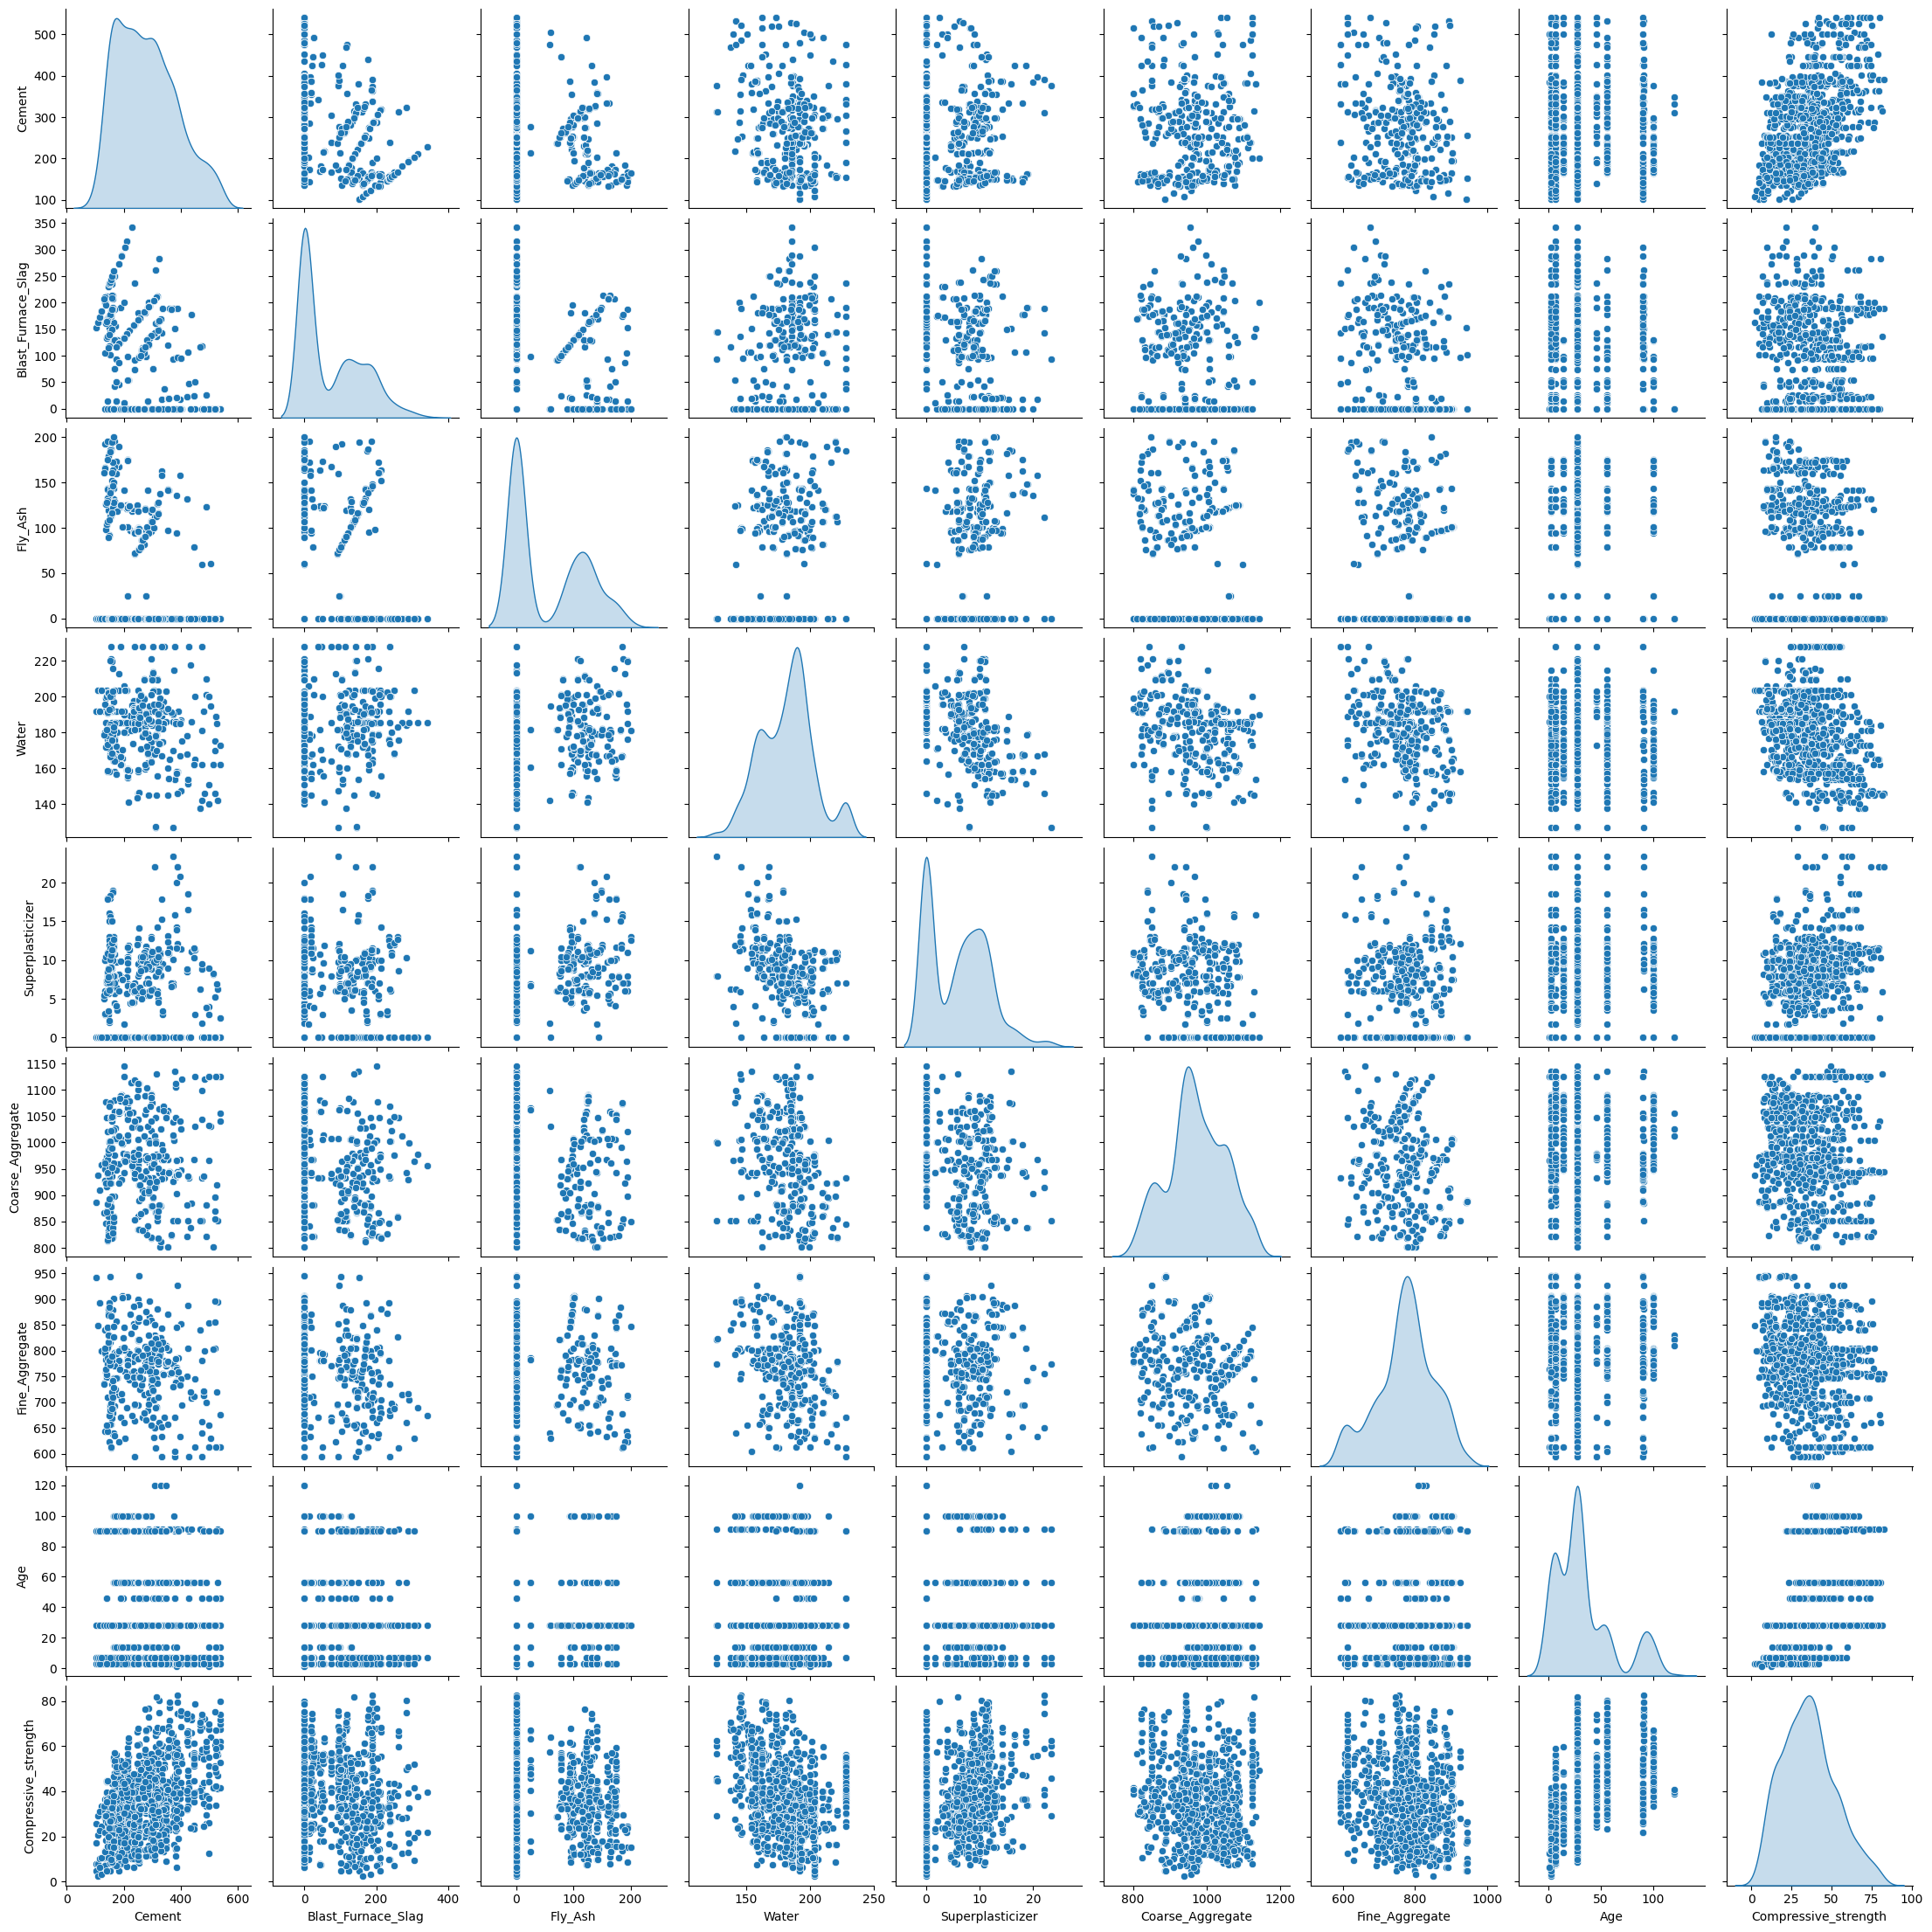

In [ ]:

sns.pairplot(data, diag_kind="kde");


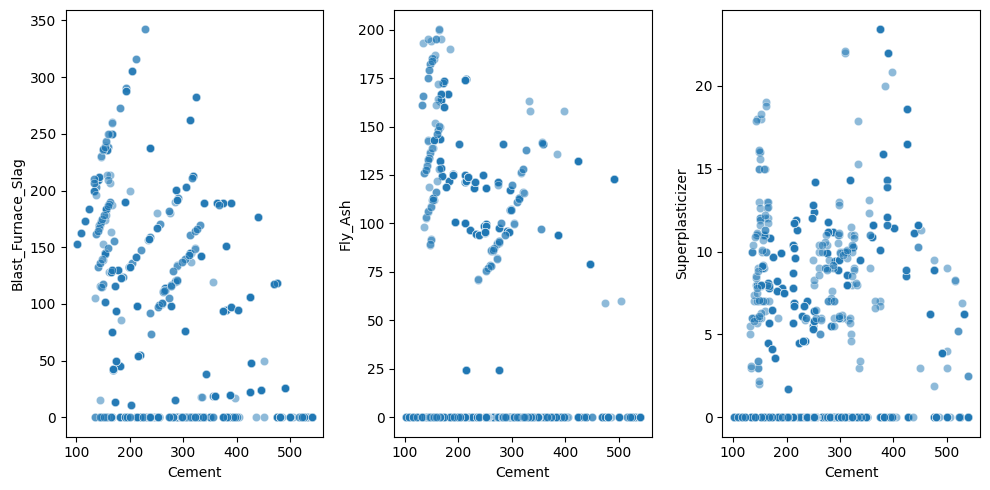

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (10,5));

sns.scatterplot(y="Blast_Furnace_Slag", x="Cement", data=data, ax=axes[0], alpha=0.5);
sns.scatterplot(y="Fly_Ash", x="Cement", data=data, ax=axes[1], alpha=0.5);
sns.scatterplot(y="Superplasticizer", x="Cement", data=data, ax=axes[2], alpha=0.5);

plt.tight_layout()
plt.show()

Observations:

* As the amount of cement increases, the amount of slag does too. A pattern is visible in the first chart.
* If we look at the cement vs flyash closely, we can see pattern with a negative slope, the amount of cement is inversely proportional to the amount of flyash.
* The cement vs superplasticizer trend is similar to that of cement vs slag.

## Algorithm Selection

In [ ]:
# Separating independent and dependent variable

X = data.drop('Compressive_strength', axis = 1)
y = data['Compressive_strength']

In [ ]:
from sklearn.model_selection import  train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=2)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.stats import pearsonr


target = "Compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type,plot=False):

    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)

    prediction = algorithm.predict(dtestx)

    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")

    print ('Performance on training data :', algorithm.score(dtrainx,dtrainy)*100)
    print ('Performance on testing data :', algorithm.score(dtestx,dtesty)*100)

    print ("***************************************************************************")
    if plot==True:
        sns.jointplot(x=dtesty, y=prediction,kind="reg", color="k")
        print("Pearson orrelation coefficient:",pearsonr(dtesty,prediction)[0])


    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=10)#,scoring="neg_mean_squared_error"
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean()*100)
    print ("cv-std  :",cross_val.std()*100)

    if plot==True:
        plt.figure(figsize=(20,22))
        plt.subplot(211)

        testy = dtesty.reset_index()["Compressive_strength"]

        ax = testy.plot(label="originals",figsize=(20,9),linewidth=2)
        ax = prediction[0].plot(label = "predictions",figsize=(20,9),linewidth=2)
        plt.legend(loc="best")
        plt.title("ORIGINALS VS PREDICTIONS")
        plt.xlabel("index")
        plt.ylabel("values")
        ax.set_facecolor("k")

        plt.subplot(212)

        if of_type == "coef":
            coef = pd.DataFrame(algorithm.coef_.ravel())
            coef["feat"] = dtrainx.columns
            ax1 = sns.barplot(x="feat",y=0,data=coef,palette="jet_r",
                              linewidth=2,edgecolor="k")
            ax1.set_facecolor("lightgrey")
            ax1.axhline(0,color="k",linewidth=2)
            plt.ylabel("coefficients")
            plt.xlabel("features")
            plt.title('FEATURE IMPORTANCES')

        elif of_type == "feat":
            coef = pd.DataFrame(algorithm.feature_importances_)
            coef["feat"] = dtrainx.columns
            ax2 = sns.barplot(x="feat",y=0,data=coef,palette="jet_r",
                              linewidth=2,edgecolor="k")
            ax2.set_facecolor("lightgrey")
            ax2.axhline(0,color="k",linewidth=2)
            plt.ylabel("coefficients")
            plt.xlabel("features")
            plt.title('FEATURE IMPORTANCES')

## XGBoost Regressor

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor(random_state=2)
#model(xgr,X_train_or,y_train_or,X_test_or,y_test_or,"feat")
model(xgr,X_train,y_train,X_test,y_test,"feat")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.462077005825715
***************************************************************************
Performance on training data : 99.4768932265966
Performance 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.9,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=-1, num_parallel_tree=None, random_state=2, ...)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.502920324749846
***************************************************************************
Performance on training data : 97.99128622878114
Performance on testing data : 92.16

<ipython-input-33-618a22493001>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="feat",y=0,data=coef,palette="jet_r",


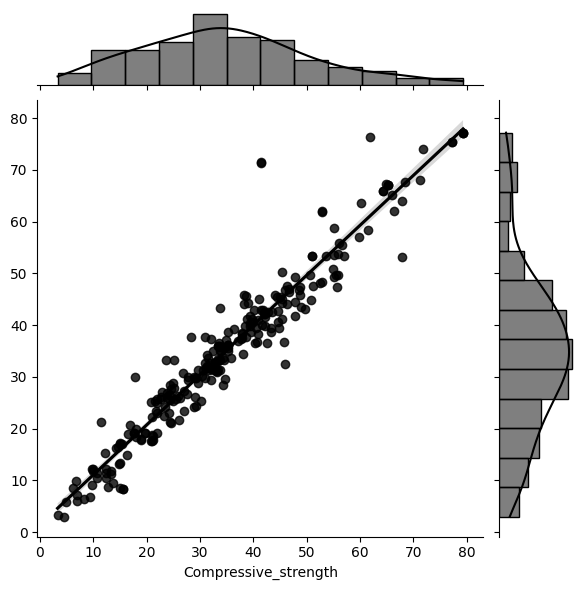

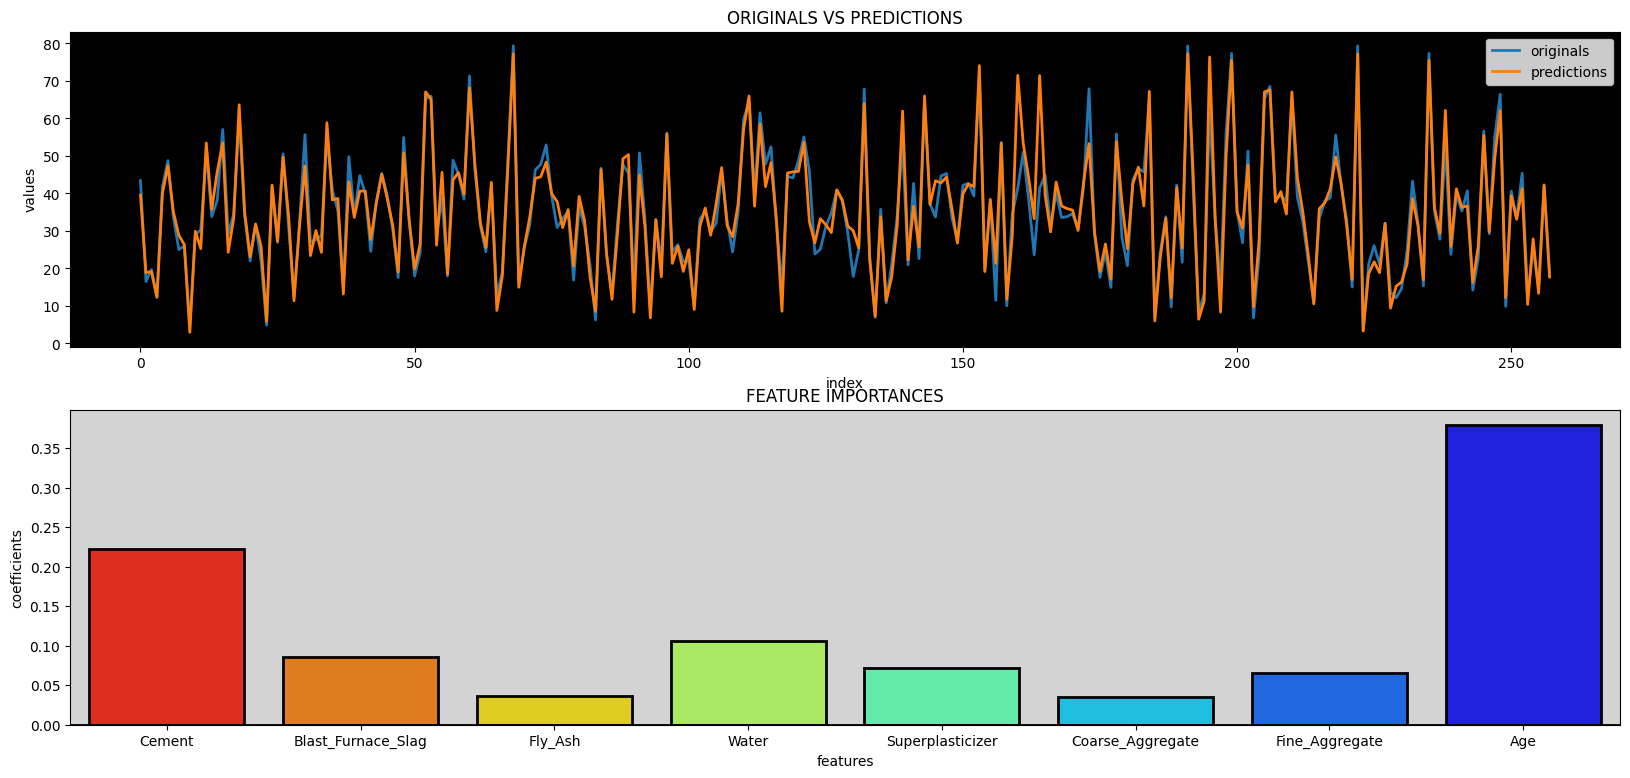

In [ ]:
xgr_1=XGBRegressor(random_state=2,learning_rate = 0.2,
                max_depth = 2, n_estimators = 800,n_jobs=-1,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)
model(xgr_1,X_train,y_train,X_test,y_test,"feat",True)

In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid={'n_estimators' : [500,800,1000,1200],
            'max_depth' : [1,2, 3,5,7,9,10,11,15],
            'learning_rate' :[ 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.8, 1.0],
                                                     }
# Create a base model
xgbr = XGBRegressor(random_state = 2,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=0.9,
                                    colsample_bynode=0.9, colsample_bytree=0.9,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0.1,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_b...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.2,
                                           0.8, 1.0],
                         'max_depth': [1, 2, 3, 5, 7, 9, 10, 11, 15],
                         'n_estimators': [500, 800, 1000, 1200]},
             verbose=2)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1200}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.9,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1200,
             n_jobs=None, num_parallel_tree=None, random_state=2, ...)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.3209268557153395
***************************************************************************
Performance on tr

<ipython-input-33-618a22493001>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="feat",y=0,data=coef,palette="jet_r",


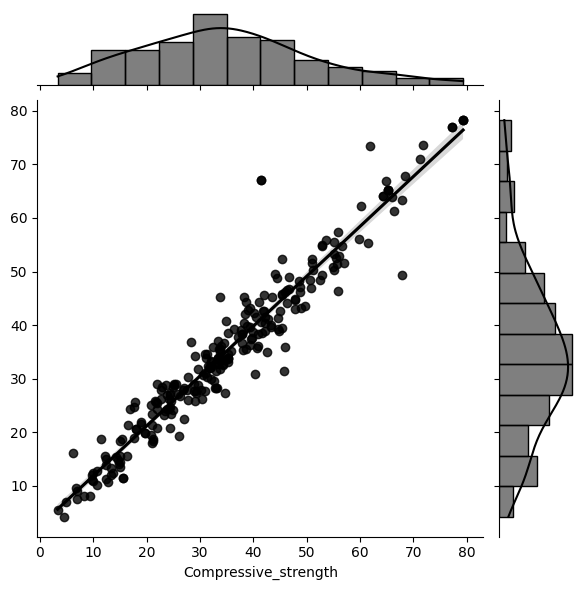

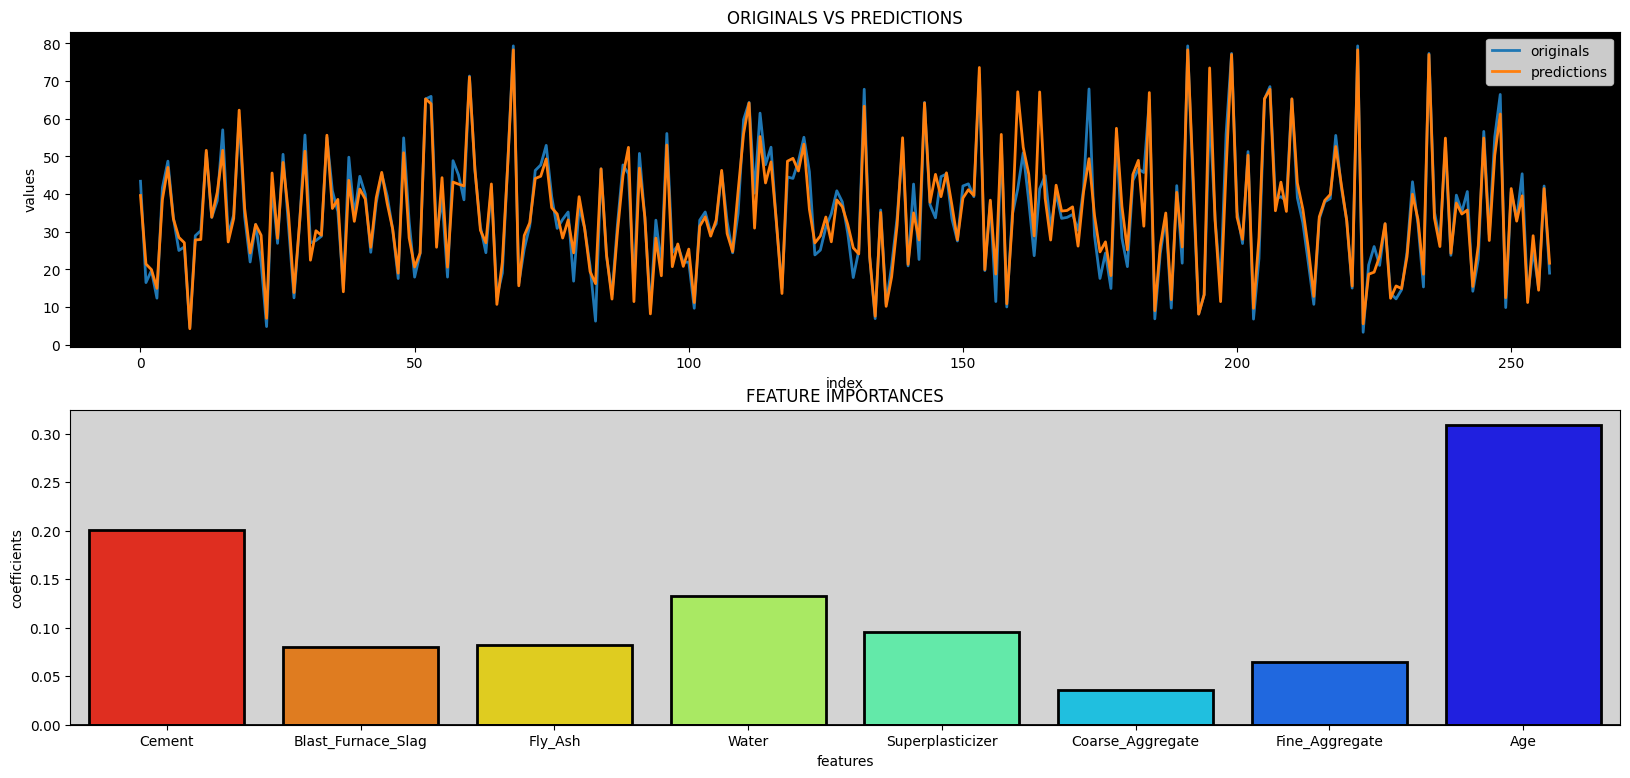

In [ ]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
model(best_grid,X_train,y_train,X_test,y_test,"feat",True)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=80,max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model(rf,X_train,y_train,X_test,y_test,"feat")

RandomForestRegressor(max_depth=80, n_estimators=400, n_jobs=-1)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.682851824153687
***************************************************************************
Performance on training data : 98.39885073221528
Performance on testing data : 91.52569102701345
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 89.83878369081525
cv-std  : 3.2181561019205795


Hence, we can see from the results that XGBoost Regressor was the most accurate one for predicting this model.